In [ ]:
'''
python numpy计算多元微分方程
https://blog.51cto.com/u_16213357/11035764
只是一个例子，一阶导数
'''

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def model(state, t):
    x, y = state
    dxdt = -y
    dydt = x
    return [dxdt, dydt]

t = np.linspace(0, 10, 1000)
state0 = [1.0, 0.0]  # 初始状态
states = odeint(model, state0, t)

plt.plot(t, states[:, 0], 'r', label='x(t)')
plt.plot(t, states[:, 1], 'b', label='y(t)')
plt.xlabel('Time')
plt.ylabel('States')
plt.legend()
plt.show()
print('只是一个例子，odeint一阶导数')

In [ ]:
# 1、通用积分函数quad()
"""
参数介绍：
func: 指定被积函数
a,b: 积分上下限
args: 指定传递给func函数的参数，元组
full_output: 设置非0，返回积分操作相关信息，默认为0
...
返回值：
y: 积分的结果值
abserr: 估计结果中的绝对误差
message: 收敛信息
explain: 仅附加'cos'和'sin'加权和无限积分限制的相关解释信息
"""
from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np

# 求半圆面积 x^2+y^2=r^2
a = -2  # 积分下限
b = 2  # 积分上限


def m_circle(x, r):
    return np.sqrt(r**2 - x**2)


area1, _ = integrate.quad(m_circle, a, b, 2)
print(area1)
plt.figure(num=1, figsize=(5, 5))
plt.rc('font',  size=15)  # 设置中文显示，字体大小
plt.rc('axes', unicode_minus=False)  # 该参数解决负号显示的问题
x = np.linspace(-2, 2, 180)
y = np.sqrt(4-x**2)
plt.plot(x, y, 'm', lw=2)
plt.fill(x, y, color='m', alpha=0.7)
plt.title('单位半圆面积为'+'{:.2f}'.format(area1))
plt.show()

In [ ]:

#https://www.osgeo.cn/sympy/tutorials/index.html
#https://www.zhihu.com/question/406011382
#https://www.cnblogs.com/huanghanyu/p/13170521.html

#https://blog.csdn.net/weixin_45549554/article/details/128743954

#sympy官方文档
#http://www.imangodoc.com/4BD2O2s1.html
#大量的例子
#https://jishulink.com/post/1188088
import sympy


C1,C2,C3 = sympy.symbols('C1 C2 C3',real=True,const=True)
x= sympy.Symbol('x')

# 二次表达式
expr = x
# 二次积分
rvl1 = integrate(expr+C1,x)
print(rvl1)
rvl2 =integrate(rvl1+C2, x)
print(rvl2)


In [ ]:
# 2、二次积分
#![例子图片](dblquaTest1.jpg)
"""
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.dblquad.html
"""



import numpy as np
from scipy import integrate
f = lambda y, x, a: a*x*y
integrate.dblquad(f, 0, 1, lambda x: x, lambda x: 2-x, args=(1,))
integrate.dblquad(f, 0, 1, lambda x: x, lambda x: 2-x, args=(3,))



In [ ]:
# 2、二次积分

#简单横的直线运动，VY0 =0,UAY = 0,
def VehTypeAfunc(dx,dy,VX0,VY0,UAX,UAY,deltT):
    dx = VX0+UAX*deltT
    dy = VY0+UYX*deltT

import numpy as np
from scipy import integrate
f = lambda y, x, a: a*x*y
integrate.dblquad(f, 0, 1, lambda x: x, lambda x: 2-x, args=(1,))
integrate.dblquad(f, 0, 1, lambda x: x, lambda x: 2-x, args=(3,))

In [ ]:
#用scipy库的odeint函数实现微分方程的数值解法
#https://blog.csdn.net/weixin_45870904/article/details/113080181
#函数原型
#https://blog.csdn.net/qq_38981614/article/details/113915904

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def diff(x,t,u1):
    return u1

u1 = 0.1

t = np.linspace(0, 10, 100)  # 给出t范围
x = odeint(diff, 0, t,args=(u1,))  # 设初值为0 此时y为一个数组，元素为不同x对应的y值

plt.plot(t, x[:, 0])  # y数组（矩阵）的第一列，（因为维度相同，plt.plot(x, y)效果相同）
plt.grid()
plt.show()  

##################################################
###直线匀加速度运动
def diff(x,t,u1):
    x0,dx0 = x #上一时刻的位置和速度
    ddx1 = u1 #下一时刻的加速度
    dx1 = dx0 #下一时刻的速度
    return [dx1,ddx1]

u1 = 0.1 #加速度的值
initD =[0,0]#初始位置和速度

t = np.linspace(0, 5, 100)  # 给出t范围
x = odeint(diff, initD, t,args=(u1,))  # 设初值为0 此时y为一个数组，元素为不同x对应的y值

plt.plot(t, x[:, 0])  
plt.plot(t, x[:, 1]) 
plt.grid()
plt.show()  

##################################################
###二次曲线运动,不行
#y =Ax**2+Bx+C
def diff(x,t,u1,A,B):
    x0,dx0,y0 = x #上一时刻的x位置和速度,y的位置
    ddx1 = u1 #下一时刻x的加速度
    dx1 = dx0 #下一时刻x的速度
    
    
    dy1 = 2*A*x0+B #下一时刻y的速度
    return [dx1,ddx1,dy1]

u1 =0 #加速度的值
A = 0.1 #二次曲线函数的系数
B = 0 
initD =[0,1,0]#初始位置和速度

t = np.linspace(0, 5, 100)  # 给出t范围
tracks = odeint(diff, initD, t,args=(u1,A,B))  # 设初值为0 此时y为一个数组，元素为不同x对应的y值

plt.plot(t, tracks[:, 0])  
plt.plot(t, tracks[:, 1]) 
plt.plot(t, tracks[:, 2])  

plt.grid()
plt.show() 
plt.plot(tracks[:, 0], tracks[:, 2]) 

plt.grid()
plt.show() 


##################################################
### Y = A-Aexp(-x)
#y =Ax**2+Bx+C
from math import exp
def diff(x,t,u1,A):
    x0,dx0,y0 = x #上一时刻的x位置和速度,y的位置
    ddx1 = u1 #下一时刻x的加速度
    dx1 = dx0 #下一时刻x的速度
    
    
    dy1 = A*exp(-x0) #下一时刻y的速度
    return [dx1,ddx1,dy1]

u1 =0 #加速度的值
A = 5 #二次曲线函数的系数

initD =[0,1,0]#初始位置和速度

t = np.linspace(0, 5, 100)  # 给出t范围
tracks = odeint(diff, initD, t,args=(u1,A))  # 设初值为0 此时y为一个数组，元素为不同x对应的y值

plt.plot(t, tracks[:, 0])  
plt.plot(t, tracks[:, 1]) 
plt.plot(t, tracks[:, 2])  

plt.grid()
plt.show() 
plt.plot(tracks[:, 0], tracks[:, 2]) 

plt.grid()
plt.show() 


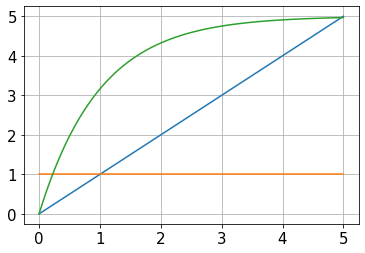

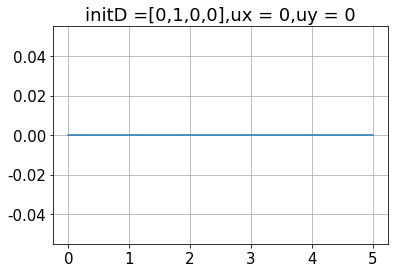

In [114]:
##################################################
### Y = A-Aexp(-x)

from math import exp
def vehTypeADym(x,t,u1,A):
    x0,dx0,y0 = x #上一时刻的x位置和速度,y的位置
    ddx1 = u1 #下一时刻x的加速度
    dx1 = dx0 #下一时刻x的速度
    
    dy1 = A*exp(-x0) #下一时刻y的速度
    return [dx1,ddx1,dy1]

#直线匀加速运动
def vehTypeBDym(x,t,ux,uy):
    x0,dx0,y0,dy0 = x #上一时刻的x和y的位置和速度
    ddx1 = ux #下一时刻x的加速度
    dx1 = dx0 #下一时刻x的速度
    
    ddy1 = uy
    dy1 = dy0
    return [dx1,ddx1,dy1,ddy1]

u1 =0 #加速度的值
initD =[0,1,0]#初始位置和速度，x的位置和速度，y位置
t = np.linspace(0, 5, 100)  # 给出t范围
tracks = odeint(vehTypeADym, initD, t,args=(u1,A))  # 设初值为0 此时y为一个数组，元素为不同x对应的y值

plt.plot(t, tracks[:, 0])  
plt.plot(t, tracks[:, 1]) 
plt.plot(t, tracks[:, 2])  

plt.grid()
plt.show() 




ux =0 #加速度的值
uy =0 #加速度的值

initD =[0,1,0,0]#初始位置和速度，x的位置和速度，y位置和速度

tracks = odeint(vehTypeBDym, initD, t,args=(ux,uy))  # 

plt.plot(tracks[:, 0], tracks[:, 2]) 
plt.grid()
plt.title('initD =[0,1,0,0],ux = 0,uy = 0')
plt.show() 




In [ ]:
##################################################
### 精简模型

#固定加速度直线
dx1 = v1 
dv1 = u1
y1 = 0

#固定加速度，二次曲线
dx2 = v2
dv2 = u2
y2 = A*x2^2+B*x2+C

J1 = Xe-X1+Xe-X2
J2 = u1+u2
J3 = 
TC = (x1-x2)^2+(y1-y2)^2



########################################################

tDur =   np.linspace(0, 5, 100)  # 持续100秒范围
init = dict()
init['A'] = [0,1,0,0,0,0]
init['B'] = [5,1,0,-5,0,0]
for ii in range(len(tDur)):
    t = tDur(ii)
    for jj in ['A','B']:
        [xPos0,xV0,xAcc0,yPos0,yV0,yAcc0] = init[jj]
        if jj == 'A':
            xPos = xPos0+xV0*t+xAcc0*t*t/2
            yPos = yPos0+yV0*t+yAcc0*t*t/2

        if jj == 'B':
            xPos = xPos0+xV0*t+xAcc0*t*t/2
            yPos =A-A*exp(-(xPos-xPos0))

        vehStats[jj][ii] = [t,xPos,yPos]
    
 
    



TclError: no display name and no $DISPLAY environment variable

In [116]:
$f(x) = a+b$

SyntaxError: invalid syntax (<ipython-input-116-3b1d96b37258>, line 1)